In [2]:
import kagglehub
import pandas as pd
import os

In [13]:
# # Download latest version
# # TODO(mononito): Find a way to route this dataset to the a specific directory, instead of the KaggleHub cache
# path = kagglehub.dataset_download("kaggle/meta-kaggle")

# print("Path to dataset files:", path)

In [14]:
PATH = "/zfsauton2/home/mgoswami/.cache/kagglehub/datasets/kaggle/meta-kaggle/versions/1647"
competitions = pd.read_csv(os.path.join(PATH, "Competitions.csv"))

# Print columns and shape
print("Columns in Competitions.csv:", competitions.columns.tolist())
print("Shape of Competitions.csv:", competitions.shape)

Columns in Competitions.csv: ['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId', 'OrganizationId', 'EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate', 'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate', 'FinalLeaderboardHasBeenVerified', 'HasKernels', 'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage', 'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation', 'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription', 'EvaluationAlgorithmIsMax', 'MaxDailySubmissions', 'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers', 'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes', 'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams', 'TotalCompetitors', 'TotalSubmissions', 'ValidationSetName', 'ValidationSetValue', 'EnableSubmissionModelHashes', 'EnableSubmissionModelAttachments', 'HostName', 'CompetitionTypeId']
Shape of Competitions.csv: (5716, 42)


<Axes: >

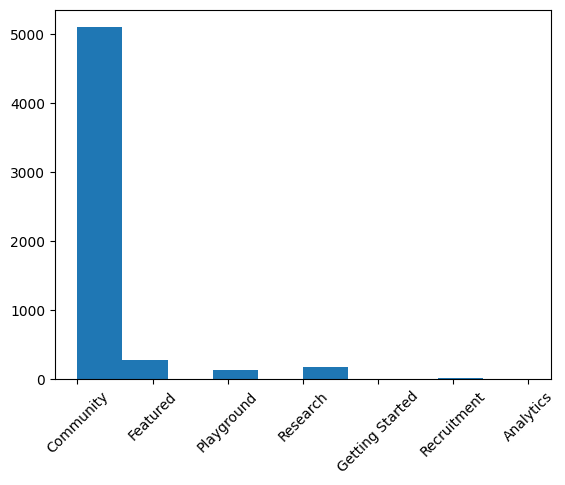

In [16]:
# Competitions by Host Segment
competitions.HostSegmentTitle.hist(xrot=45, grid=False)

In [146]:
research_competitions = competitions[competitions.HostSegmentTitle == "Featured"].loc[
    :, ["Id", "Title", "Subtitle", "TotalCompetitors", 'EvaluationAlgorithmName', 
        "RewardQuantity", "HasLeaderboard", "FinalLeaderboardHasBeenVerified"]].sort_values(by="TotalCompetitors", ascending=False)
research_competitions

,Id,Title,Subtitle,TotalCompetitors,EvaluationAlgorithmName,RewardQuantity,HasLeaderboard,FinalLeaderboardHasBeenVerified
1201,10385,Santander Customer Transaction Prediction,Can you identify who will make a transaction?,9787,Area Under Receiver Operating Characteristic C...,65000.0,True,True
1215,9120,Home Credit Default Risk,Can you predict how capable each applicant is ...,8373,Area Under Receiver Operating Characteristic C...,70000.0,True,True
5547,52784,ICR - Identifying Age-Related Conditions,Use Machine Learning to detect conditions with...,7327,Weighted Multiclass Loss,60000.0,True,True
5582,18599,M5 Forecasting - Accuracy,Estimate the unit sales of Walmart retail goods,7022,M5 Weighted (Rowwise) Root Mean Squared Scaled...,50000.0,True,True
5621,35332,American Express - Default Prediction,Predict if a customer will default in the future,6003,Amex Custom Gini And X% Percentage Capture,100000.0,True,True
...,...,...,...,...,...,...,...,...
736,3090,Harvard Business Review 'Vision Statement' Pro...,Your Analysis and/or Visualization featured in...,0,Root Mean Squared Error,2500.0,False,True
740,3199,GE Hospital Quest,Think it’s possible to make hospital visits ha...,0,Root Mean Squared Error,100000.0,False,True
4243,18601,Google Cloud & NCAA® ML Competition 2020-NCAAM,Apply Machine Learning to NCAA® March Madness®,0,Log Loss,NaN,True,True
4244,18602,Google Cloud & NCAA® ML Competition 2020-NCAAW,Apply Machine Learning to NCAA® March Madness®,0,Log Loss,NaN,True,True


In [ ]:
from google import genai
from google.genai import types

# Only run this block for Gemini Developer API
client = genai.Client(api_key='')

In [148]:
SYSTEM_PROMPT = """You are given a list of research competitions. Each competition includes:  
- Title
- Subtitle
- Total competitors
- Evaluation algorithm name
- Reward quantity
- Whether it has a leaderboard

Your goal is to determine whether each competition is likely to involve **time series or temporal data**. Process each competition and extract the relevant information.  

### Output Format 
Provide the output as a JSON list of dictionaries, with each dictionary structured as follows:  

```json
{
    "Id": <competition_id>,
    "Title": <competition_title>,
    "LikelyTimeSeries": <"High", "Medium", "Low">,
    "Modality": <"text", "image", "tabular", "audio", "video", "other"> OR [<list of modalities>],
    "Justification": <reasoning for classification>
}
```

### Instructions
1. **Strictly follow the JSON structure**—do not include additional text, comments, or special characters.  
2. **Time Series Classification:**  
   - **"High"**: The dataset is very likely to be time series or temporal.  
   - **"Medium"**: The dataset could be time series but is uncertain.  
   - **"Low"**: The dataset is not time series.  
3. **Modality Selection:**  
   - Choose from: `"text"`, `"image"`, `"tabular"`, `"audio"`, `"video"`, or `"other"`.  
   - If multiple modalities apply, return them as a **list**.  
   - Use `"other"` **only** when none of the specified modalities fit.  
4. **Justification:**  
   - Provide a **concise** but **clear** explanation of why you assigned the selected time series likelihood.  

### Example Output  

```json
[
    {
        "Id": "1234",
        "Title": "Stock Price Prediction Challenge",
        "LikelyTimeSeries": "High",
        "Modality": "tabular",
        "Justification": "The competition involves predicting stock prices, which are naturally time-dependent."
    },
    {
        "Id": "5678",
        "Title": "Medical Image Classification",
        "LikelyTimeSeries": "Low",
        "Modality": "image",
        "Justification": "Medical images are typically static, with no temporal dependency."
    },
]
```
Here is the list of competitions: \n
"""

BATCH_SIZE = 20
MODEL = "gemini-2.0-flash"
MAX_TRIES = 3
responses = []

import re
import tqdm
pattern = re.compile(r'```json\n(.*?)\n```', re.DOTALL)  # Match everything in between ```python and ```

prompt = SYSTEM_PROMPT
for i, (index, row) in tqdm.tqdm(enumerate(research_competitions.iterrows()), total=len(research_competitions)):
    prompt = prompt + f"{dict(row)} \n"
    
    # print(f"Processing batch {i + 1} out of {len(research_competitions)}")
    if ((i + 1) % BATCH_SIZE == 0) or (i == len(research_competitions) - 1):
        for _ in range(MAX_TRIES):
            response = client.models.generate_content(model=MODEL, contents=prompt)
            prompt = SYSTEM_PROMPT  # Reset prompt

            try:
                response = eval(pattern.findall(response.text)[0].replace("\n", ""))    
                responses.extend(response)
                prompt = SYSTEM_PROMPT
                break  # Exit loop if response is valid

            except Exception as e:
                print(f"Error: {e}. Retrying...")

100%|██████████| 281/281 [02:23<00:00,  1.95it/s]


In [149]:
responses = pd.DataFrame(responses)
responses['Id'] = responses['Id'].astype(int)
annotated_competitions = responses.merge(research_competitions, on="Id", suffixes=("_response", "_original"))

# Save to CSV
annotated_competitions.to_csv("annotated_featured_competitions.csv", index=False)